# Heart Disease Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the UCI Heart Disease dataset to understand:
1. Dataset structure and basic statistics
2. Missing value patterns
3. Target variable distribution
4. Feature distributions and relationships
5. Correlation analysis
6. Key insights for modeling

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/heart_disease_uci.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (920, 16)

Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

First few rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 2. Basic Data Information

In [3]:
# Data types and non-null counts
print("Dataset Information:")
print("="*60)
df.info()

print("\n" + "="*60)
print("Basic Statistics:")
print("="*60)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Basic Statistics:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 3. Missing Value Analysis

Missing Values Summary:
          Missing Count  Missing Percentage
ca                  611           66.413043
thal                486           52.826087
slope               309           33.586957
fbs                  90            9.782609
oldpeak              62            6.739130
trestbps             59            6.413043
exang                55            5.978261
thalch               55            5.978261
chol                 30            3.260870
restecg               2            0.217391

Total columns with missing values: 10
Total missing values: 1759


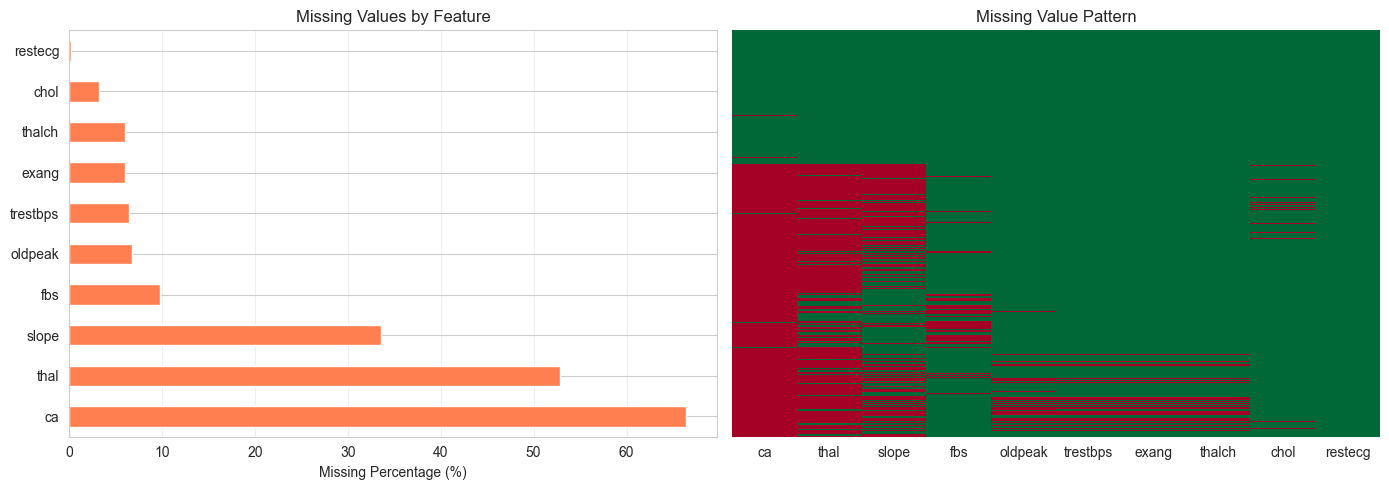

In [4]:
# Calculate missing values
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing Count', ascending=False)

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("Missing Values Summary:")
print("="*60)
print(missing_df)
print(f"\nTotal columns with missing values: {len(missing_df)}")
print(f"Total missing values: {df.isnull().sum().sum()}")

# Visualize missing values
if len(missing_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    missing_df['Missing Percentage'].plot(kind='barh', ax=axes[0], color='coral')
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_title('Missing Values by Feature')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Heatmap
    sns.heatmap(df[missing_df.index].isnull(), cbar=False, yticklabels=False, 
                cmap='RdYlGn_r', ax=axes[1])
    axes[1].set_title('Missing Value Pattern')
    
    plt.tight_layout()
    plt.show()

## 4. Target Variable Analysis

Target Variable ('num') Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Class Balance:
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


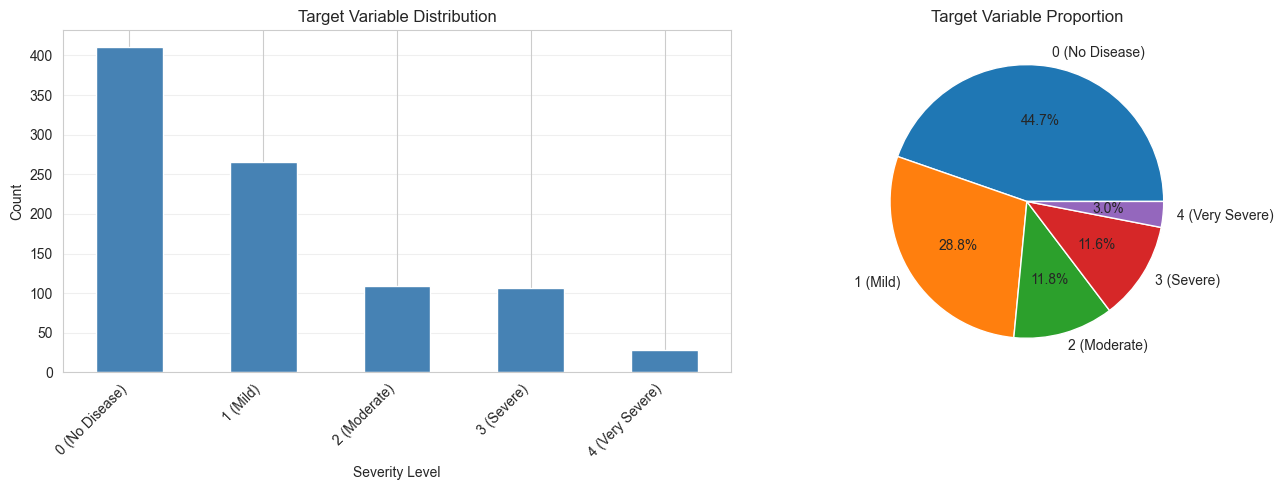


Class Imbalance Analysis:
Class 0: 411 samples (Imbalance Ratio: 1.00:1)
Class 1: 265 samples (Imbalance Ratio: 1.55:1)
Class 2: 109 samples (Imbalance Ratio: 3.77:1)
Class 3: 107 samples (Imbalance Ratio: 3.84:1)
Class 4: 28 samples (Imbalance Ratio: 14.68:1)


In [5]:
# Target variable distribution
print("Target Variable ('num') Distribution:")
print("="*60)
print(df['num'].value_counts().sort_index())
print(f"\nClass Balance:")
print(df['num'].value_counts(normalize=True).sort_index() * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Severity Level')
axes[0].set_ylabel('Count')
axes[0].set_title('Target Variable Distribution')
axes[0].set_xticklabels(['0 (No Disease)', '1 (Mild)', '2 (Moderate)', '3 (Severe)', '4 (Very Severe)'], 
                        rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
df['num'].value_counts().sort_index().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                            labels=['0 (No Disease)', '1 (Mild)', '2 (Moderate)', 
                                                    '3 (Severe)', '4 (Very Severe)'])
axes[1].set_ylabel('')
axes[1].set_title('Target Variable Proportion')

plt.tight_layout()
plt.show()

# Check class imbalance
print("\n" + "="*60)
print("Class Imbalance Analysis:")
print("="*60)
class_counts = df['num'].value_counts().sort_index()
max_class = class_counts.max()
for severity, count in class_counts.items():
    imbalance_ratio = max_class / count
    print(f"Class {severity}: {count} samples (Imbalance Ratio: {imbalance_ratio:.2f}:1)")

## 5. Numerical Features Analysis

Numerical Features Statistics:
              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


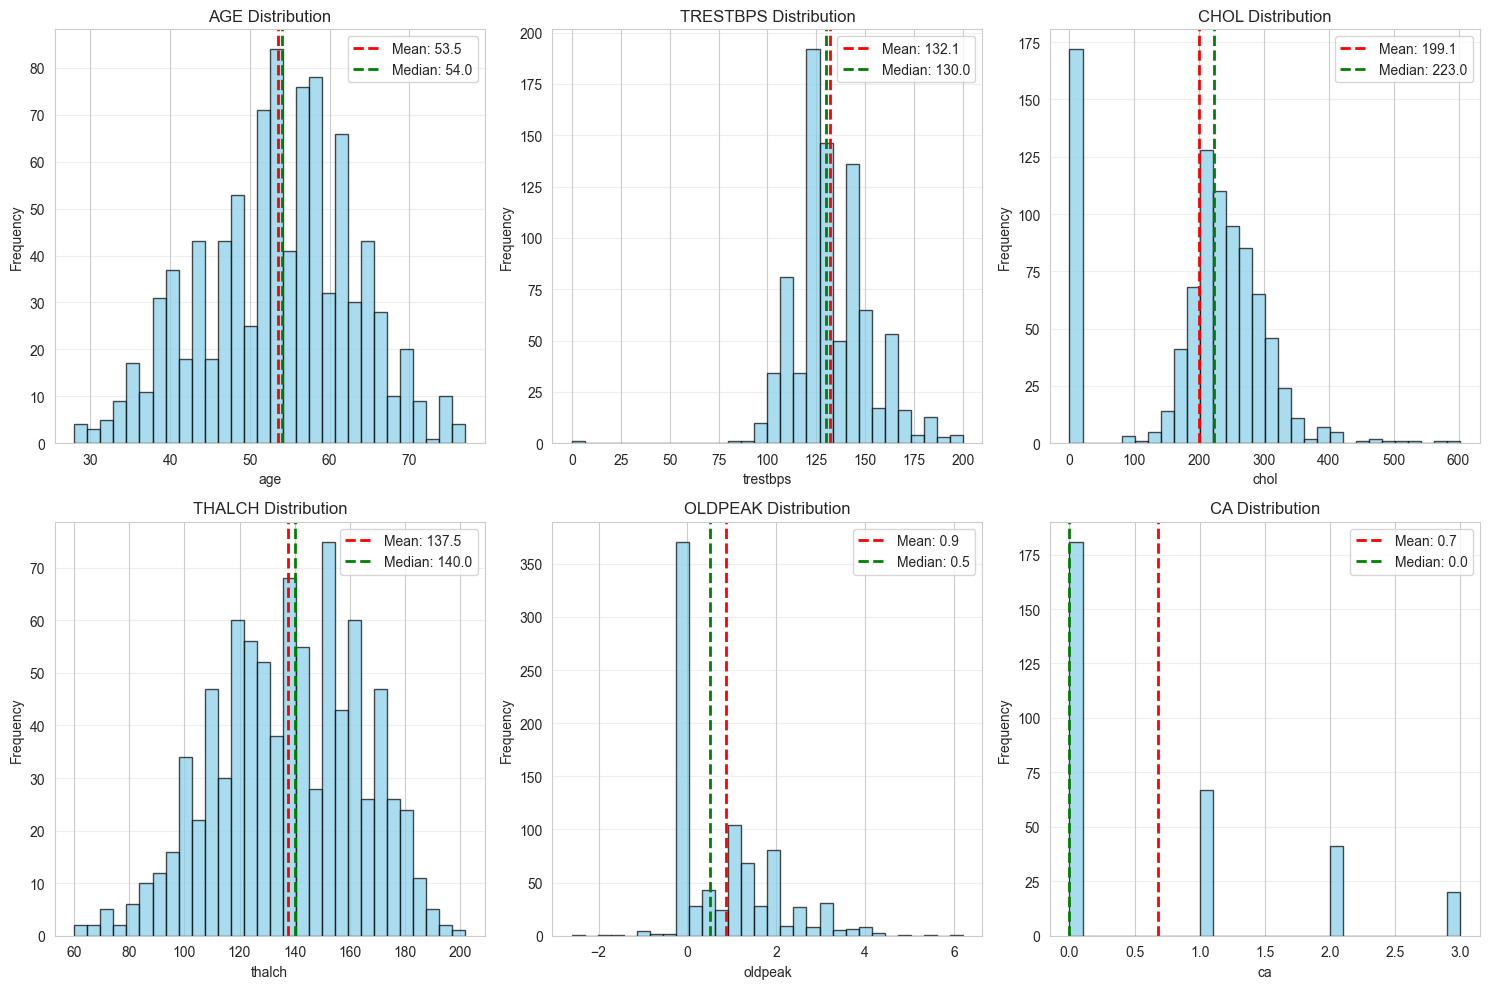

In [6]:
# Identify numerical features
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
numeric_df = df[numeric_features].copy()

print("Numerical Features Statistics:")
print("="*60)
print(numeric_df.describe())

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    data = df[feature].dropna()
    axes[idx].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature.upper()} Distribution')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

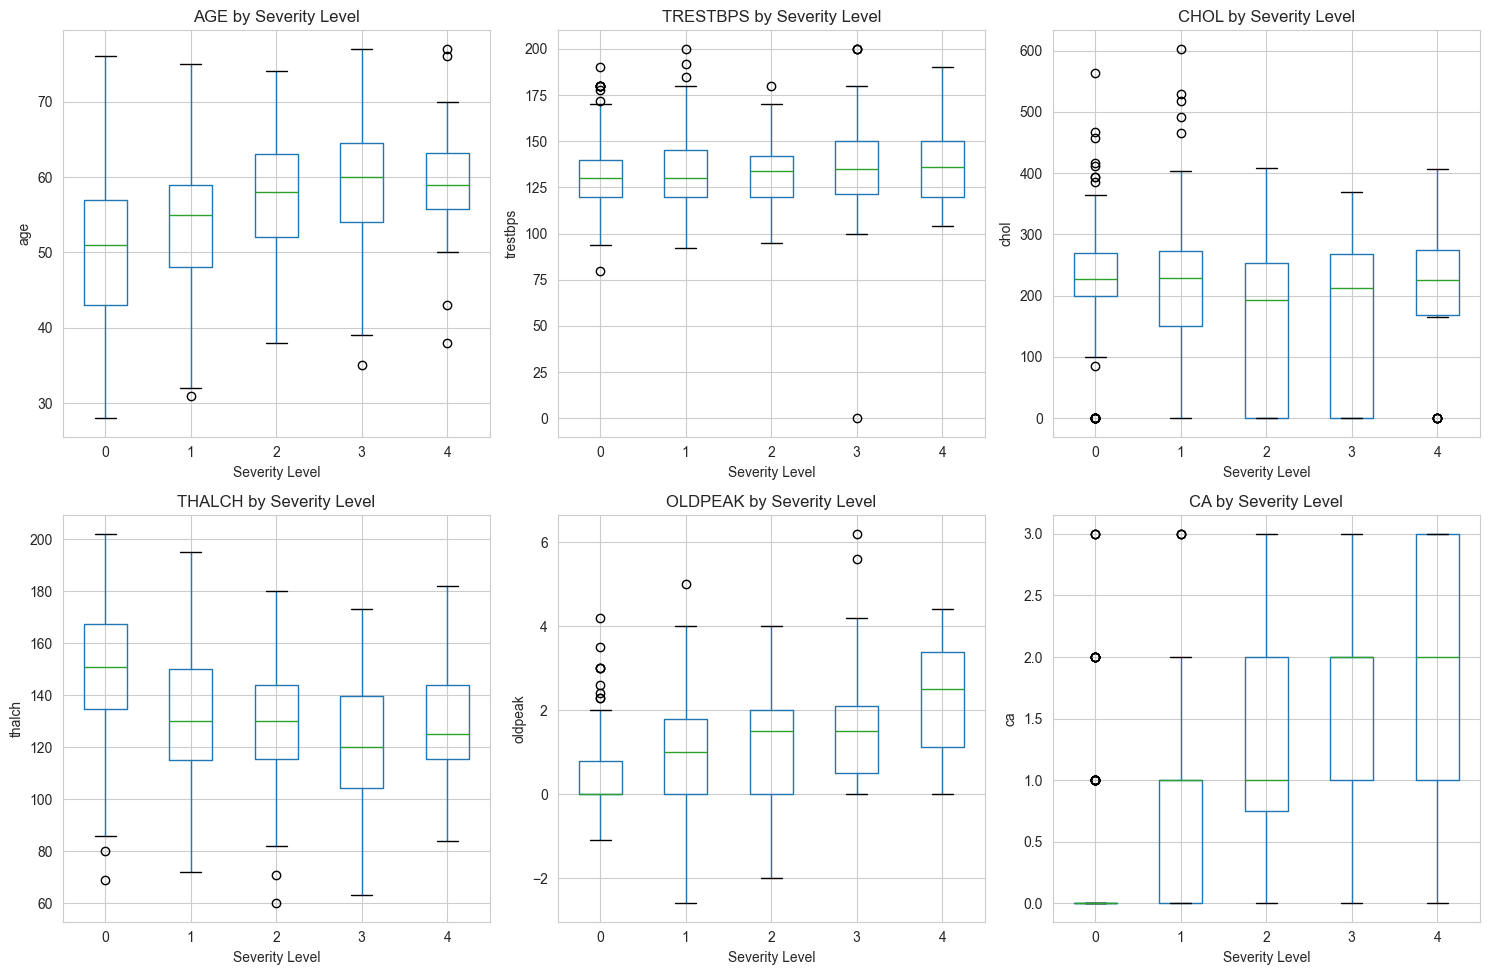

In [7]:
# Box plots by target variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    df.boxplot(column=feature, by='num', ax=axes[idx])
    axes[idx].set_title(f'{feature.upper()} by Severity Level')
    axes[idx].set_xlabel('Severity Level')
    axes[idx].set_ylabel(feature)
    axes[idx].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [8]:
# Identify categorical features
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

print("Categorical Features Distribution:")
print("="*60)

for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    print(df[feature].value_counts())
    print(f"Missing: {df[feature].isnull().sum()}")

Categorical Features Distribution:

SEX:
sex
Male      726
Female    194
Name: count, dtype: int64
Missing: 0

DATASET:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
Missing: 0

CP:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
Missing: 0

FBS:
fbs
False    692
True     138
Name: count, dtype: int64
Missing: 90

RESTECG:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
Missing: 2

EXANG:
exang
False    528
True     337
Name: count, dtype: int64
Missing: 55

SLOPE:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
Missing: 309

THAL:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
Missing: 486


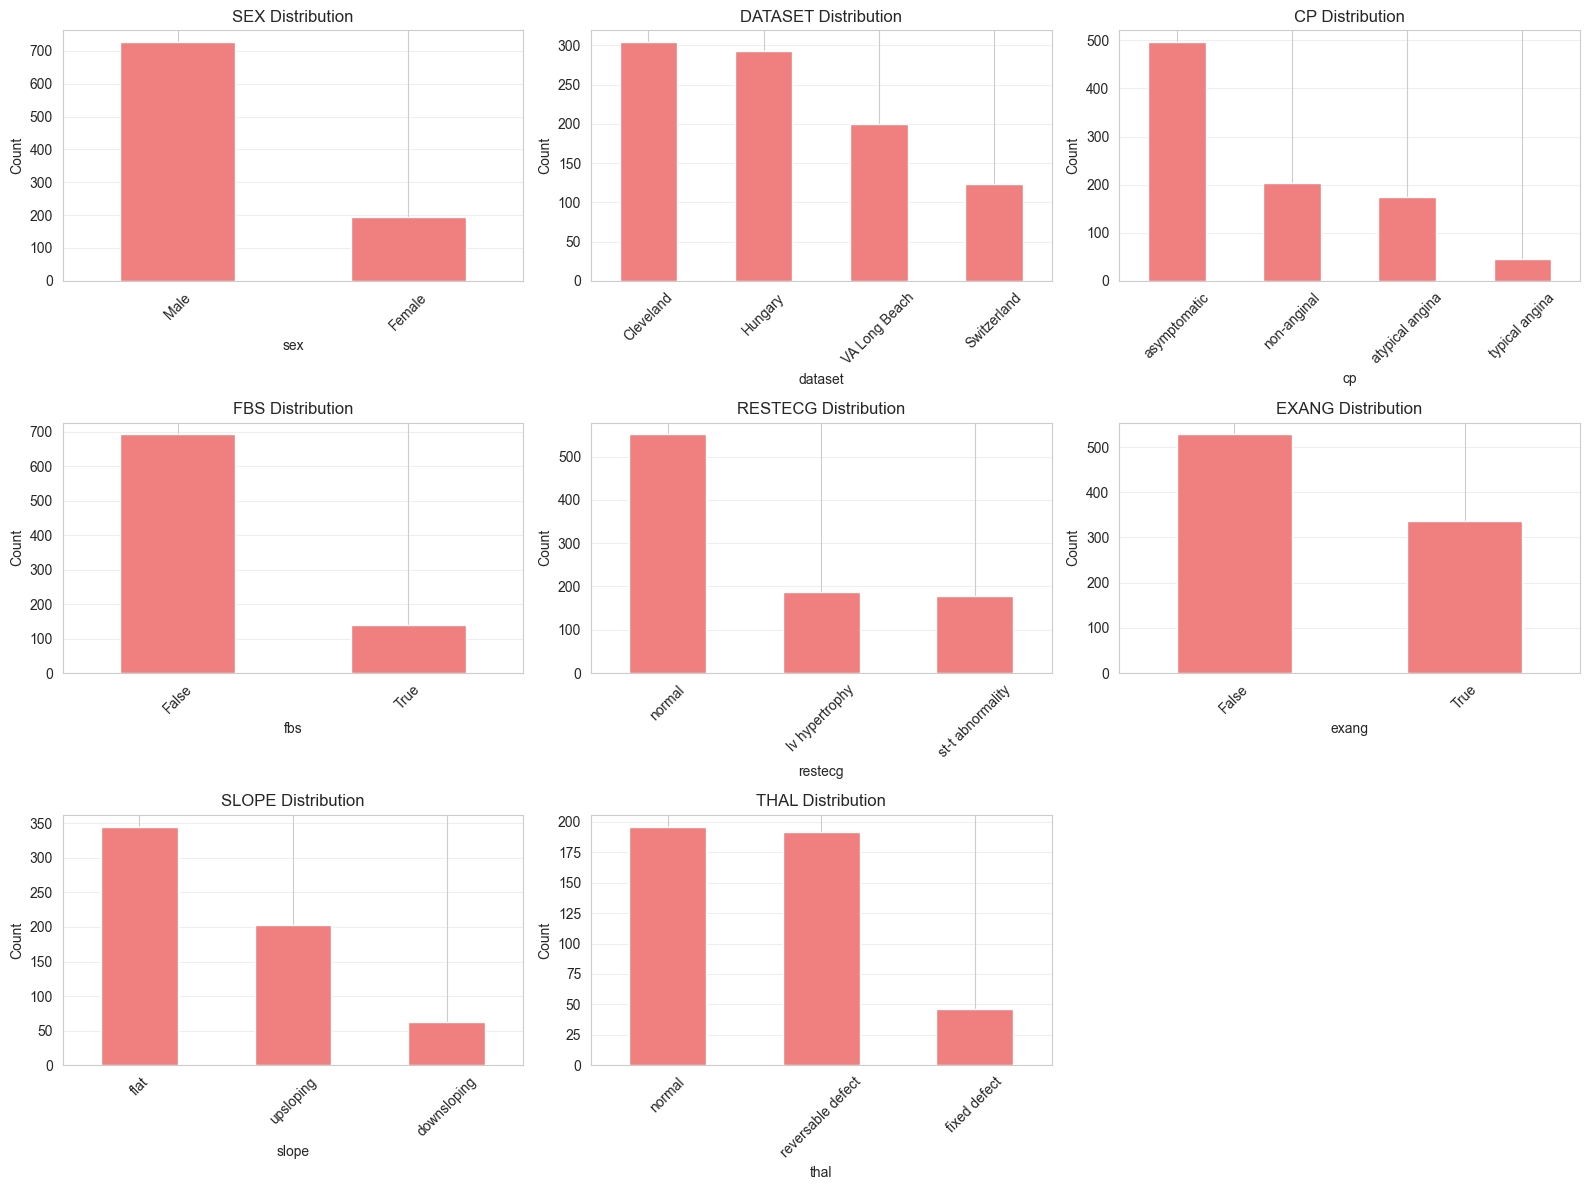

In [9]:
# Visualize categorical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='lightcoral')
        axes[idx].set_title(f'{feature.upper()} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

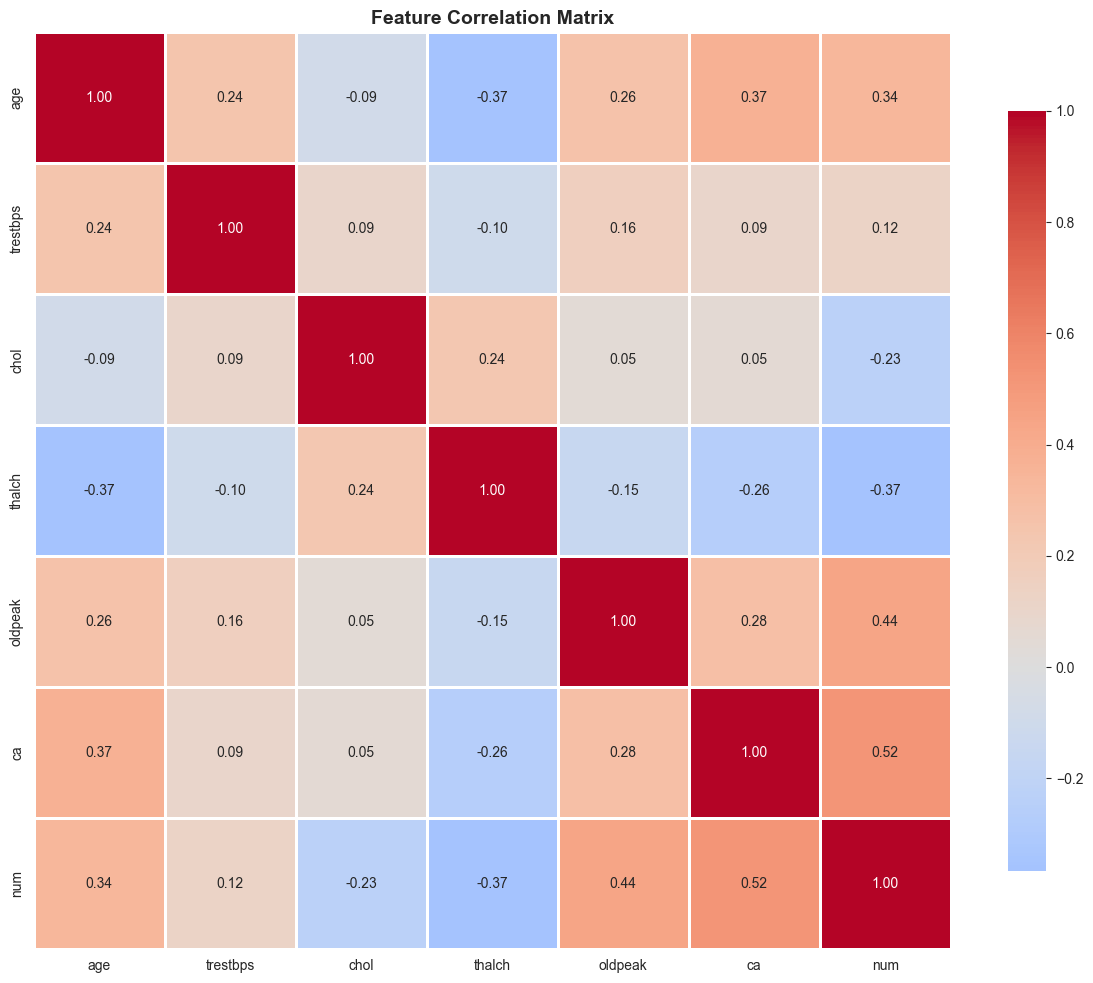


Correlation with Target Variable ('num'):
ca          0.516216
oldpeak     0.443084
age         0.339596
trestbps    0.122291
chol       -0.231547
thalch     -0.366265
Name: num, dtype: float64


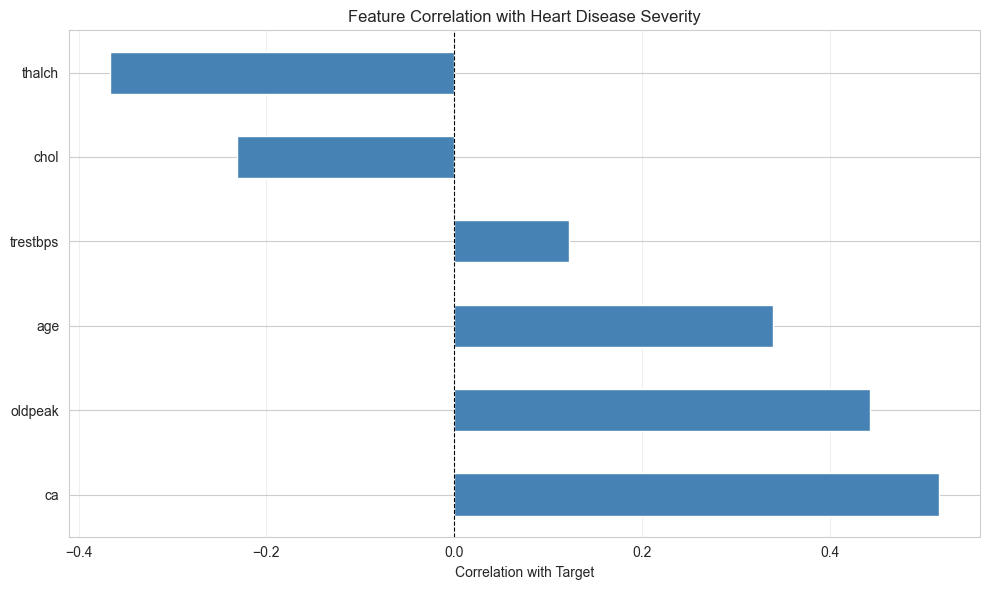

In [10]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'id' if present
if 'id' in numeric_cols:
    numeric_cols.remove('id')

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("\nCorrelation with Target Variable ('num'):")
print("="*60)
target_corr = corr_matrix['num'].drop('num').sort_values(ascending=False)
print(target_corr)

# Visualize correlation with target
plt.figure(figsize=(10, 6))
target_corr.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Target')
plt.title('Feature Correlation with Heart Disease Severity')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Bivariate Analysis - Key Feature Relationships

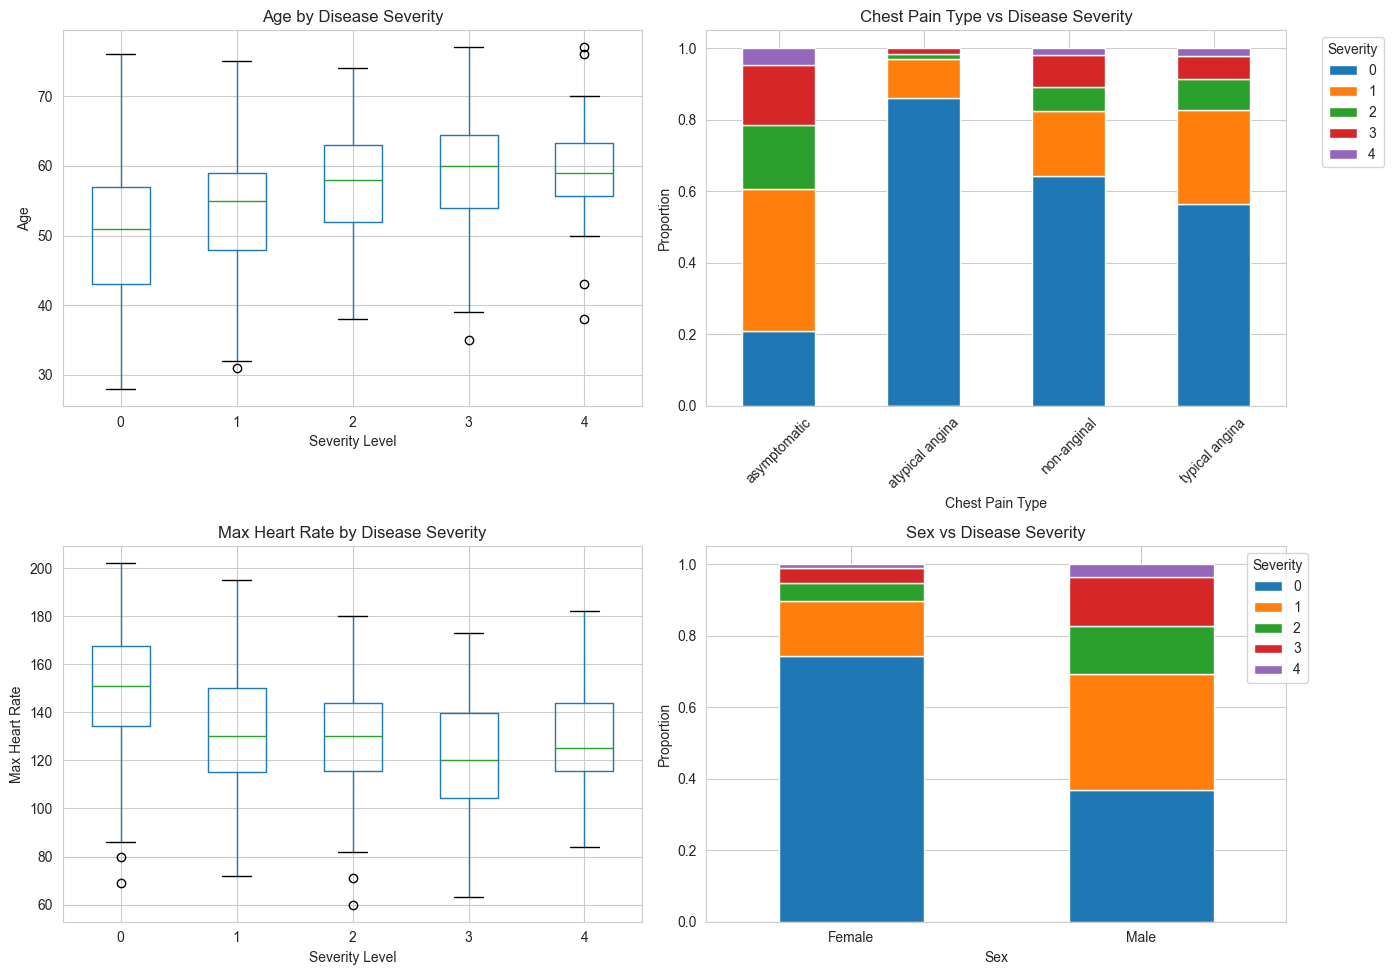

In [11]:
# Analyze key relationships with target variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age vs Target
df.boxplot(column='age', by='num', ax=axes[0, 0])
axes[0, 0].set_title('Age by Disease Severity')
axes[0, 0].set_xlabel('Severity Level')
axes[0, 0].set_ylabel('Age')
axes[0, 0].get_figure().suptitle('')

# Chest pain type vs Target
pd.crosstab(df['cp'], df['num'], normalize='index').plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain Type vs Disease Severity')
axes[0, 1].set_xlabel('Chest Pain Type')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Severity', bbox_to_anchor=(1.05, 1))
axes[0, 1].tick_params(axis='x', rotation=45)

# Max heart rate vs Target
df.boxplot(column='thalch', by='num', ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate by Disease Severity')
axes[1, 0].set_xlabel('Severity Level')
axes[1, 0].set_ylabel('Max Heart Rate')
axes[1, 0].get_figure().suptitle('')

# Sex vs Target
pd.crosstab(df['sex'], df['num'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Sex vs Disease Severity')
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Severity', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 9. Key Insights and Recommendations

In [12]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

# Dataset overview
print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Total features: {len(df.columns)}")
print(f"   - Numeric features: {len(numeric_features)}")
print(f"   - Categorical features: {len(categorical_features)}")

# Missing values
print("\n2. MISSING VALUES:")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"   - Total missing values: {total_missing}")
    print(f"   - Features with missing values: {len(missing_df)}")
    print(f"   - Most missing feature: {missing_df.index[0]} ({missing_df.iloc[0]['Missing Percentage']:.1f}%)")
    print("   - Recommendation: Use KNN imputation for better handling of missing patterns")
else:
    print("   - No missing values found")

# Class imbalance
print("\n3. CLASS IMBALANCE:")
class_counts = df['num'].value_counts().sort_index()
max_class = class_counts.max()
min_class = class_counts.min()
print(f"   - Most common class: {class_counts.idxmax()} ({max_class} samples)")
print(f"   - Least common class: {class_counts.idxmin()} ({min_class} samples)")
print(f"   - Imbalance ratio: {max_class/min_class:.1f}:1")
print("   - Recommendation: Use SMOTE/BorderlineSMOTE for handling class imbalance")

# Feature importance
print("\n4. FEATURE CORRELATION WITH TARGET:")
top_corr = target_corr.head(3)
print("   - Top 3 positively correlated features:")
for feature, corr_val in top_corr.items():
    print(f"     • {feature}: {corr_val:.3f}")
bottom_corr = target_corr.tail(3)
print("   - Top 3 negatively correlated features:")
for feature, corr_val in bottom_corr.items():
    print(f"     • {feature}: {corr_val:.3f}")

# Recommendations
print("\n5. MODELING RECOMMENDATIONS:")
print("   - Use hierarchical classification (Binary + Multi-class) to handle class imbalance")
print("   - Apply BorderlineSMOTE for multi-class classification")
print("   - Consider feature engineering (e.g., age groups, risk scores)")
print("   - Use stratified train-test split to maintain class distributions")
print("   - Focus on F1-score due to class imbalance")

print("\n" + "="*80)
print("EDA COMPLETE - Ready for preprocessing and modeling")
print("="*80)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total samples: 920
   - Total features: 16
   - Numeric features: 6
   - Categorical features: 8

2. MISSING VALUES:
   - Total missing values: 1759
   - Features with missing values: 10
   - Most missing feature: ca (66.4%)
   - Recommendation: Use KNN imputation for better handling of missing patterns

3. CLASS IMBALANCE:
   - Most common class: 0 (411 samples)
   - Least common class: 4 (28 samples)
   - Imbalance ratio: 14.7:1
   - Recommendation: Use SMOTE/BorderlineSMOTE for handling class imbalance

4. FEATURE CORRELATION WITH TARGET:
   - Top 3 positively correlated features:
     • ca: 0.516
     • oldpeak: 0.443
     • age: 0.340
   - Top 3 negatively correlated features:
     • trestbps: 0.122
     • chol: -0.232
     • thalch: -0.366

5. MODELING RECOMMENDATIONS:
   - Use hierarchical classification (Binary + Multi-class) to handle class imbalance
   - Apply BorderlineSMOTE for multi-class classification